# `modtox.Collection`
A collection is a group of `modtox.Molecules` that has some functionalities. First of all, let's load the collection from sdf files.

In [1]:
from modtox.modtox.Molecules.col import CollectionFromSDF
import os
target = "5tnt"
ACTIVES = os.path.join(os.path.abspath(""), "data", target, "actives.sdf")
INACTIVES = os.path.join(os.path.abspath(""), "data", target, "inactives.sdf")

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')  # Disable warnings (molecule is tagged as 3D, but all Z coords are zero)

c = CollectionFromSDF(ACTIVES, INACTIVES)

### Calculating features
The following features can be calculated for each molecule:
- __Topological__ fingerprints from `rdkit` module.
- __Morgan__ fingerprints from `rdkit` module. 
- __Mordred__ descriptors from `mordred` module.

In addition we can add the previously calculated docking features (__Glide features__), which we will need to supply the path to the `.csv`.  
We will calculate the mordred descriptors and the topological fingerprints for this collection:

In [2]:
from modtox.modtox.utils.enums import Features
c.add_features(Features.mordred, Features.topo, Features.morgan)

Calculating mordred descriptors...


100%|██████████| 556/556 [02:05<00:00,  4.43it/s]


Calculating topological fingerprints...


100%|██████████| 556/556 [00:03<00:00, 183.71it/s]


Calculating Morgan fingerprints...


100%|██████████| 556/556 [00:00<00:00, 734.40it/s] 


The features are stored within each molecule of the collection. Let's illustrate that:

In [3]:
mol = c.molecules[0]
mol.features.keys()

dict_keys([<Features.mordred: 2>, <Features.topo: 3>, <Features.morgan: 4>])

In [4]:
%pprint
mol.features[Features.mordred]

Pretty printing has been turned OFF


{'mordred_ABC': 30.10025237734431, 'mordred_ABCGG': 22.785922915982216, 'mordred_nAcid': 0, 'mordred_nBase': 0, 'mordred_SpAbs_A': 48.748814812558074, 'mordred_SpMax_A': 2.4575993479095897, 'mordred_SpDiam_A': 4.9137599404947965, 'mordred_SpAD_A': 48.748814812558074, 'mordred_SpMAD_A': 1.2828635476988968, 'mordred_LogEE_A': 4.575862771289559, 'mordred_VE1_A': 5.281141446777675, 'mordred_VE2_A': 0.13897740649414936, 'mordred_VE3_A': 2.999143324188143, 'mordred_VR1_A': 380.3410456389658, 'mordred_VR2_A': 10.008974885235942, 'mordred_VR3_A': 7.27606940547435, 'mordred_nAromAtom': 27, 'mordred_nAromBond': 28, 'mordred_nAtom': 59, 'mordred_nHeavyAtom': 38, 'mordred_nSpiro': 0, 'mordred_nBridgehead': 0, 'mordred_nHetero': 10, 'mordred_nH': 21, 'mordred_nB': 0, 'mordred_nC': 28, 'mordred_nN': 5, 'mordred_nO': 1, 'mordred_nS': 0, 'mordred_nP': 0, 'mordred_nF': 2, 'mordred_nCl': 2, 'mordred_nBr': 0, 'mordred_nI': 0, 'mordred_nX': 4, 'mordred_ATS0dv': 573.2098765432099, 'mordred_ATS1dv': 579.222

In [5]:
print(f"Number of mordred descriptors: {len(mol.features[Features.mordred])}")
print(f"Number of topological fingerprints: {len(mol.features[Features.topo])}")

Number of mordred descriptors: 1613
Number of topological fingerprints: 2048


### Clustering
Tanimoto clustering can be performed to the collection. The clustering can be done using topological or Morgan fingerprints (which will be calculated if are not already calculated). A distance cut off value needs to be supplied. The higher the cut off, the smaller the number of clusters (more members per cluster).    

Clustering sets the attribute `c.clusters`: list of clusters with the indexes of the molecules. The first item of each cluster is the cluster centroid.  

Clustering also links a `modtox.Cluster` object to each molecule.

In [6]:
c.clusters = c.cluster(cutoff=0.4, fp="topological")
first_cluster = c.clusters[0]
first_cluster

(144, 7, 8, 15, 16, 17, 18, 19, 20, 21, 32, 33, 52, 57, 60, 61, 62, 64, 65, 66, 69, 70, 81, 82, 83, 84, 85, 86, 91, 92, 100, 101, 102, 103, 106, 107, 109, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 138, 139, 140, 141, 142, 143, 146, 148, 149, 150, 151, 152, 153, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 190, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 299, 300, 303, 306, 307, 321, 330, 331, 

> *Note:* numbers correspond to the indexes of `c.molecules` list.  

For the first cluster

In [7]:
i = 0
print(f"Cluster ID: {i}")
print(f"Cluster members: {len(c.clusters[i])}")
print(f"Cluster centroid: {c.clusters[i][0]}")

Cluster ID: 0
Cluster members: 282
Cluster centroid: 144


And if we access molecule with index 67:

In [8]:
mol = c.molecules[c.clusters[0][0]]
print(f"Cluster ID: {mol.cluster.id}")
print(f"Cluster members: {mol.cluster.members}")
print(f"Cluster centroid: {mol.cluster.is_centroid}")

Cluster ID: 0
Cluster members: 282
Cluster centroid: True


Clustering will be used for removing outliers of the collection. To help us decide the clustering strategy, we can quickly plot different cutoff values and fingerprints type.  
For visualization purposes, a list of outlier threshold (e.g.: the threshold of members a cluster needs to have to not be considered outlier) can be supplied.

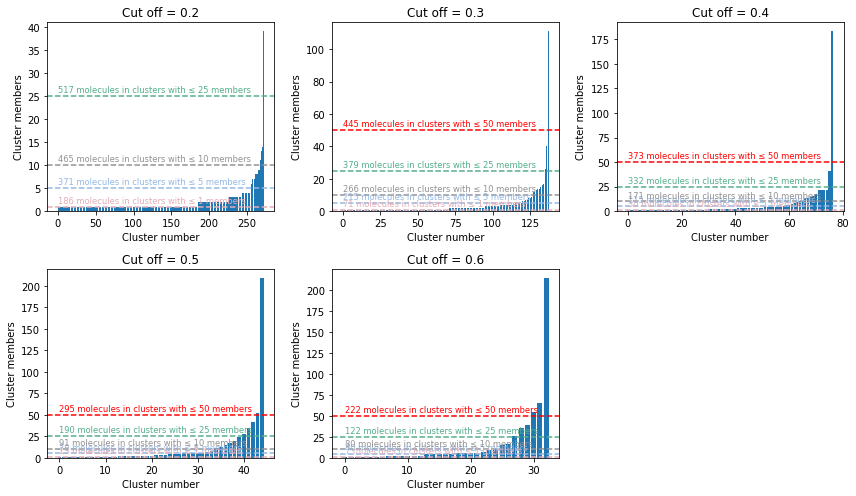

In [9]:
m_plot = c.plot_clustering_parameters(cutoffs=[0.2, 0.3, 0.4, 0.5, 0.6], thresholds=[1, 5, 10, 25, 50], fp="morgan")

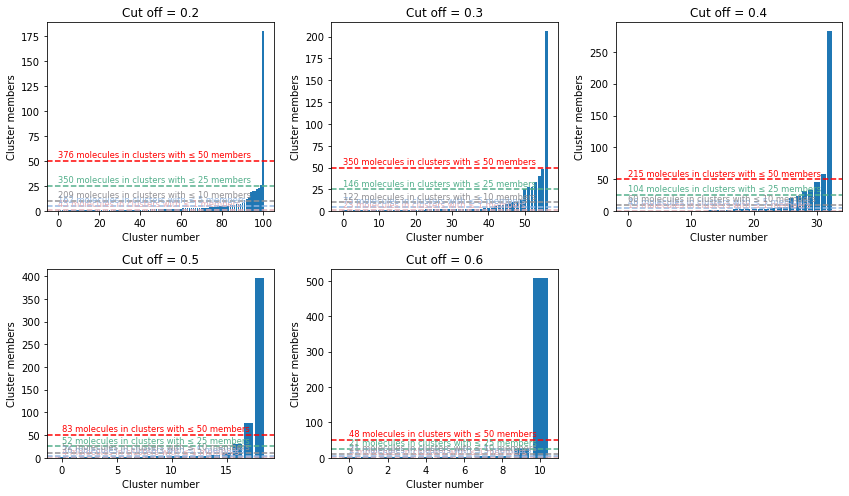

In [10]:
t_plot = c.plot_clustering_parameters(cutoffs=[0.2, 0.3, 0.4, 0.5, 0.6], thresholds=[1, 5, 10, 25, 50], fp="topological")

For this example, the cutoff value selected is 0.4 for Morgan fingerprints. It is important to cluster the collection again or it will be clustered according to the last parameters.

In [15]:
cutoff = 0.3
fp = "morgan"
c.cluster(cutoff=cutoff, fp=fp)
with open(f"data/{target}/cluster.txt", "w") as f:
    f.write(f"cutoff = {cutoff}\nfp={fp}")
;

''

### Export to dataframe
Finally, collection can be exported to a `pandas` dataframe for the next steps. The dataframe will include all calculated features and cluster information.

In [12]:
df = c.to_dataframe()

In [13]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

df

,Activity,cluster_id,cluster_members,is_centroid,mordred_ABC,...,morgan_fp_1019,morgan_fp_1020,morgan_fp_1021,morgan_fp_1022,morgan_fp_1023
0,True,25.0,4.0,False,30.100,...,0.0,0.0,0.0,0.0,0.0
1,True,4.0,41.0,False,25.053,...,0.0,0.0,0.0,0.0,0.0
2,True,12.0,22.0,False,29.521,...,0.0,0.0,0.0,0.0,0.0
3,True,12.0,22.0,False,29.521,...,0.0,0.0,0.0,0.0,0.0
4,True,9.0,22.0,False,22.196,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
551,False,0.0,183.0,False,33.970,...,1.0,0.0,0.0,0.0,0.0
552,False,8.0,22.0,True,22.156,...,0.0,0.0,0.0,0.0,0.0
553,False,23.0,10.0,False,20.563,...,0.0,0.0,0.0,0.0,0.0
554,False,23.0,10.0,False,20.563,...,0.0,0.0,0.0,0.0,0.0


In [14]:
import pickle5
with open(f"data/{target}/{target}.pickle", "wb") as f:
    pickle5.dump(c, f)
    
df.to_csv(f"data/{target}/mordred_topo_morgan.csv")
m_plot.savefig(f"data/{target}/morgan_clusters.png")
t_plot.savefig(f"data/{target}/topo_clusters.png")          